# Natural Language Processing

## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

## Cleaning the texts - Without Not

In [ ]:
'''import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords #remove a, the, an, he, she, they etc
from nltk.stem.porter import PorterStemmer #Apply Stemming. Remove past tense, future tense. to keep words in present tense
corpus = [] #list of clean reviews
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]',' ',dataset['Review'][i]) #Remove all punctuations !.,
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)] #remove stopwords
    review = ' '.join(review) #convert list to sentence
    corpus.append(review)'''

"import re\nimport nltk\nnltk.download('stopwords')\nfrom nltk.corpus import stopwords #remove a, the, an, he, she, they etc\nfrom nltk.stem.porter import PorterStemmer #Apply Stemming. Remove past tense, future tense. to keep words in present tense\ncorpus = [] #list of clean reviews\nfor i in range(0,1000):\n    review = re.sub('[^a-zA-Z]',' ',dataset['Review'][i]) #Remove all punctuations !.,\n    review = review.lower()\n    review = review.split()\n    ps = PorterStemmer()\n    all_stopwords = stopwords.words('english')\n    all_stopwords.remove('not')\n    review = [ps.stem(word) for word in review if not word in set(all_stopwords)] #remove stopwords\n    review = ' '.join(review) #convert list to sentence\n    corpus.append(review)"

## Cleaning the texts - Model Optimisation

In [ ]:
import re
import nltk
from nltk.stem.porter import PorterStemmer #Apply Stemming. Remove past tense, future tense. to keep words in present tense
corpus = [] #list of clean reviews
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]',' ',dataset['Review'][i]) #Remove all punctuations !.,
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review] #Steming
    review = ' '.join(review) #convert list to sentence
    corpus.append(review)

In [ ]:
print(corpus)

['wow love thi place', 'crust is not good', 'not tasti and the textur wa just nasti', 'stop by dure the late may bank holiday off rick steve recommend and love it', 'the select on the menu wa great and so were the price', 'now i am get angri and i want my damn pho', 'honeslti it didn t tast that fresh', 'the potato were like rubber and you could tell they had been made up ahead of time be kept under a warmer', 'the fri were great too', 'a great touch', 'servic wa veri prompt', 'would not go back', 'the cashier had no care what so ever on what i had to say it still end up be wayyy overpr', 'i tri the cape cod ravoli chicken with cranberri mmmm', 'i wa disgust becaus i wa pretti sure that wa human hair', 'i wa shock becaus no sign indic cash onli', 'highli recommend', 'waitress wa a littl slow in servic', 'thi place is not worth your time let alon vega', 'did not like at all', 'the burritto blah', 'the food amaz', 'servic is also cute', 'i could care less the interior is just beauti', 's

## Creating the Bag of Words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer(max_features=1500) #total number words. Avoid words like steve which are less common
cv = CountVectorizer() #To Improve Model Performance
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,-1].values

In [ ]:
len(X[0]) #Total Numbers of Words - Index Row

1682

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Naive Bayes model on the Training set

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Training the Random Forrest model on the Training set

In [ ]:
rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 222, random_state = 0)
rf_classifier.fit(rf_X_train, rf_y_train)

RandomForestClassifier(n_estimators=222, random_state=0)

## Training the Logistic Regression on the Training set

In [ ]:
log_X_train, log_X_test, log_y_train, log_y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 0)
log_classifier.fit(log_X_train,log_y_train)

LogisticRegression(random_state=0)

## Training the Kernal SVM on the Training set

In [ ]:
KSVM_X_train, KSVM_X_test, KSVM_y_train, KSVM_y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.svm import SVC
KSVM_classifier = SVC(kernel = 'rbf', random_state = 0)
KSVM_classifier.fit(KSVM_X_train, KSVM_y_train)

SVC(random_state=0)

## Training the KNN on the Training set

In [ ]:
KNN_X_train, KNN_X_test, KNN_y_train, KNN_y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_classifier.fit(KNN_X_train, KNN_y_train)

KNeighborsClassifier()

## Training the SVM Linear on the Training set

In [ ]:
SVM_X_train, SVM_X_test, SVM_y_train, SVM_y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.svm import SVC
SVM_classifier = SVC(kernel = 'linear', random_state = 0)
SVM_classifier.fit(SVM_X_train, SVM_y_train)

SVC(kernel='linear', random_state=0)

## Predicting the Test set results - Naive Bayes

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

## Predicting the Test set results - Random Forrest


In [ ]:
rf_y_pred = rf_classifier.predict(rf_X_test)
print(np.concatenate((rf_y_pred.reshape(len(rf_y_pred),1), rf_y_test.reshape(len(rf_y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]

## Predicting the Test set results - Logistic Regression

In [ ]:
log_y_pred=log_classifier.predict(log_X_test)
print(np.concatenate((log_y_pred.reshape(len(log_y_pred),1),log_y_test.reshape(len(log_y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]

## Predicting the Test set results - Kernel SVM

In [ ]:
KSVM_y_pred = KSVM_classifier.predict(KSVM_X_test)
print(np.concatenate((KSVM_y_pred.reshape(len(KSVM_y_pred),1), KSVM_y_test.reshape(len(KSVM_y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]

## Predicting the Test set results - KNN

In [ ]:
KNN_y_pred = KNN_classifier.predict(KNN_X_test)
print(np.concatenate((KNN_y_pred.reshape(len(KNN_y_pred),1), KNN_y_test.reshape(len(KNN_y_test),1)),1))

[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

## Predicting the Test set results - SVM

In [ ]:
SVM_y_pred = SVM_classifier.predict(SVM_X_test)
print(np.concatenate((SVM_y_pred.reshape(len(SVM_y_pred),1), SVM_y_test.reshape(len(SVM_y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]

## Making the Confusion Matrix - Naive Bayes

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[55 42]
 [12 91]]
0.73
0.6842105263157895
0.883495145631068
0.7711864406779662


## Making the Confusion Matrix - Random Forrest

In [ ]:
cm = confusion_matrix(rf_y_test, rf_y_pred)
print(cm)
print(accuracy_score(rf_y_test, rf_y_pred))
print(precision_score(rf_y_test, rf_y_pred))
print(recall_score(rf_y_test, rf_y_pred))
print(f1_score(rf_y_test, rf_y_pred))

[[84 13]
 [24 79]]
0.815
0.8586956521739131
0.7669902912621359
0.8102564102564103


## Making the Confusion Matrix - Logistic Regression

In [ ]:
cm = confusion_matrix(log_y_test, log_y_pred)
print(cm)
print(accuracy_score(log_y_test, log_y_pred))
print(precision_score(log_y_test, log_y_pred))
print(recall_score(log_y_test, log_y_pred))
print(f1_score(log_y_test, log_y_pred))

[[82 15]
 [20 83]]
0.825
0.8469387755102041
0.8058252427184466
0.8258706467661692


## Making the Confusion Matrix - Kernel SVM

In [ ]:
cm = confusion_matrix(KSVM_y_test, KSVM_y_pred)
print(cm)
print(accuracy_score(KSVM_y_test, KSVM_y_pred))
print(precision_score(KSVM_y_test, KSVM_y_pred))
print(recall_score(KSVM_y_test, KSVM_y_pred))
print(f1_score(KSVM_y_test, KSVM_y_pred))

[[85 12]
 [26 77]]
0.81
0.8651685393258427
0.7475728155339806
0.8020833333333334


## Making the Confusion Matrix - KNN

In [ ]:
cm = confusion_matrix(KNN_y_test, KNN_y_pred)
print(cm)
print(accuracy_score(KNN_y_test, KNN_y_pred))
print(precision_score(KNN_y_test, KNN_y_pred))
print(recall_score(KNN_y_test, KNN_y_pred))
print(f1_score(KNN_y_test, KNN_y_pred))

[[64 33]
 [39 64]]
0.64
0.6597938144329897
0.6213592233009708
0.64


## Making the Confusion Matrix - SVM Linear

In [ ]:
cm = confusion_matrix(SVM_y_test, SVM_y_pred)
print(cm)
print(accuracy_score(SVM_y_test, SVM_y_pred))
print(precision_score(SVM_y_test, SVM_y_pred))
print(recall_score(SVM_y_test, SVM_y_pred))
print(f1_score(SVM_y_test, SVM_y_pred))

[[82 15]
 [22 81]]
0.815
0.84375
0.7864077669902912
0.8140703517587939


## Heatmap For Better Visualization of Model Performance

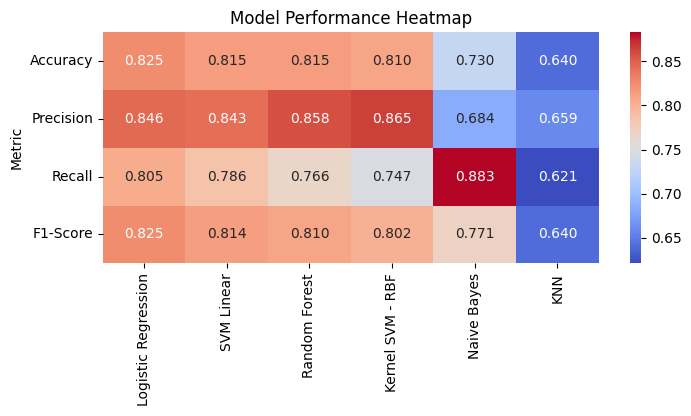

In [767]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example metrics data
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Logistic Regression': [0.825, 0.846, 0.805, 0.825],
    'SVM Linear': [0.815, 0.843, 0.786, 0.814],
    'Random Forest': [0.815, 0.858, 0.766, 0.810],
    'Kernel SVM - RBF': [0.81, 0.865, 0.747, 0.802],
    'Naive Bayes': [0.73, 0.684, 0.883, 0.771],
    'KNN': [0.64, 0.659, 0.621, 0.64]
}

# Create DataFrame
df_metrics = pd.DataFrame(data).set_index('Metric')

# Heatmap
plt.figure(figsize=(8, 3))
sns.heatmap(df_metrics, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Model Performance Heatmap')
plt.show()
